# WeatherPy

In [24]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Importing API key
from api_keys import weather_api_key

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

## Cities List

In [2]:
# Create empty lists for coordinates and their cities
lats_lngs = []
cities = []

# Set the latitude and longitude range
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a lists of random latitudes and longitudes
# Use large size enough to ensure 500+ unique cities after API call
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# Zip into one list for use in loop
lats_lngs = zip(lats, lngs)

# Identify the city according to coordinates
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add cities list
    if city not in cities:
        cities.append(city)
        
print("There are " + str(len(cities)) + " cities used in this analysis.")

There are 612 cities used in this analysis.


### API Calls



In [3]:
# Lists and counters for data retrieval
city_name_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
record_counter = 0
set_counter = 1

# Build partial query URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Use imperial as we are using mph and fahrenheit
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Use loop for each city in cities
for record, city in enumerate(cities, start = 1):
    try:
        # Retrieve json file
        response = requests.get(query_url + city).json()
        
        # Record data
        city_name_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])        
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])       
        
        # Change set after 50 records
        if record_counter > 49:
            record_counter = 0
            set_counter += 1
    
        else:
            record_counter += 1
            
        print(f"Processing Record {record_counter} of Set {set_counter} : {city}") 
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of Set 1 : moussoro
Processing Record 2 of Set 1 : kontagora
Processing Record 3 of Set 1 : faanui
Processing Record 4 of Set 1 : tripoli
Processing Record 5 of Set 1 : kalmunai
Processing Record 6 of Set 1 : kapaa
Processing Record 7 of Set 1 : namwala
Processing Record 8 of Set 1 : hobart
Processing Record 9 of Set 1 : victoria
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : macusani
Processing Record 12 of Set 1 : zykovo
Processing Record 13 of Set 1 : hofn
Processing Record 14 of Set 1 : petropavlovsk-kamchatskiy
Processing Record 15 of Set 1 : kavarskas
Processing Record 16 of Set 1 : tiksi
Processing Record 17 of Set 1 : olinda
Processing Record 18 of Set 1 : kui buri
Processing Record 19 of Set 1 : port elizabeth
City not found. Skipping...
Processing Record 20 of Set 1 : erenhot
Processing Record 21 of Set 1 : hunxe
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 1 :

Processing Record 33 of Set 4 : souillac
Processing Record 34 of Set 4 : la ronge
Processing Record 35 of Set 4 : hithadhoo
Processing Record 36 of Set 4 : bonthe
Processing Record 37 of Set 4 : iskateley
Processing Record 38 of Set 4 : ponta do sol
Processing Record 39 of Set 4 : khor
Processing Record 40 of Set 4 : garissa
City not found. Skipping...
Processing Record 41 of Set 4 : buchanan
Processing Record 42 of Set 4 : ciudad bolivar
Processing Record 43 of Set 4 : bilibino
Processing Record 44 of Set 4 : rafai
Processing Record 45 of Set 4 : taoudenni
Processing Record 46 of Set 4 : high river
Processing Record 47 of Set 4 : salinas
Processing Record 48 of Set 4 : eureka
City not found. Skipping...
Processing Record 49 of Set 4 : sorland
Processing Record 50 of Set 4 : alta floresta
City not found. Skipping...
Processing Record 0 of Set 5 : ulladulla
Processing Record 1 of Set 5 : idrinskoye
Processing Record 2 of Set 5 : buraydah
Processing Record 3 of Set 5 : bengkulu
Processin

Processing Record 16 of Set 8 : ostrowiec swietokrzyski
Processing Record 17 of Set 8 : krasnoselkup
Processing Record 18 of Set 8 : salinopolis
Processing Record 19 of Set 8 : abu samrah
Processing Record 20 of Set 8 : palma di montechiaro
Processing Record 21 of Set 8 : coquimbo
Processing Record 22 of Set 8 : seaford
Processing Record 23 of Set 8 : kamenka
Processing Record 24 of Set 8 : shimoda
Processing Record 25 of Set 8 : port-gentil
Processing Record 26 of Set 8 : reims
Processing Record 27 of Set 8 : poum
Processing Record 28 of Set 8 : aswan
Processing Record 29 of Set 8 : narsaq
City not found. Skipping...
City not found. Skipping...
Processing Record 30 of Set 8 : asosa
City not found. Skipping...
Processing Record 31 of Set 8 : barreirinhas
City not found. Skipping...
Processing Record 32 of Set 8 : manzanares
Processing Record 33 of Set 8 : minuri
Processing Record 34 of Set 8 : irbil
Processing Record 35 of Set 8 : lukovetskiy
Processing Record 36 of Set 8 : machhlishah

### Convert Raw Data to DataFrame

In [4]:
weather_df = pd.DataFrame({
    "City" : city_name_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
})

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moussoro,13.6408,16.4901,95.83,34,44,12.15,TD,1631971114
1,Kontagora,10.3999,5.4695,84.29,66,100,5.97,NG,1631971115
2,Faanui,-16.4833,-151.7500,77.81,76,16,21.61,PF,1631971117
3,Tripoli,32.8752,13.1875,91.92,35,0,10.42,LY,1631970886
4,Kalmunai,7.4167,81.8167,83.41,75,78,7.81,LK,1631971118


In [8]:
# Check for duplicate rows
duplicate = weather_df[weather_df.duplicated()]
duplicate

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
# Ensure count is above 500
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,21.158618,17.143600,66.864283,69.589606,54.550179,8.336362,1.631971e+09
std,33.244395,90.328113,17.755672,21.243270,40.257075,5.645014,2.359615e+02
min,-54.800000,-175.200000,14.270000,1.000000,0.000000,0.000000,1.631971e+09
25%,-6.292850,-60.055175,52.187500,59.000000,12.000000,4.172500,1.631971e+09
50%,25.405850,20.431300,71.125000,75.500000,63.500000,7.050000,1.631971e+09
75%,49.265925,96.932125,79.532500,85.000000,98.000000,11.230000,1.631972e+09
max,78.218600,179.316700,110.700000,100.000000,100.000000,34.230000,1.631972e+09


In [10]:
# Export data into csv file
weather_df.to_csv("output_data/cities.csv", index = False)

## Plotting the Data

## Latitude vs. Temperature Plot

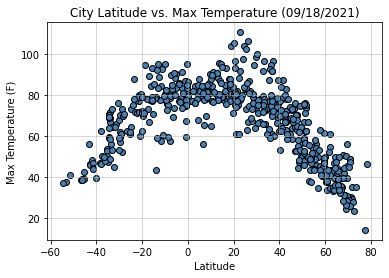

In [15]:
# Create Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title, labels and gridline
plt.title("City Latitude vs. Max Temperature (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linewidth=1, alpha = 0.5)

# Export as .png file
plt.savefig("output_data/City Latitude vs Max Temperature.png")

There is a rough concave down shape suggesting max temperature is highest at 0 latitude and decreases as you move away from it.

## Latitude vs. Humidity Plot

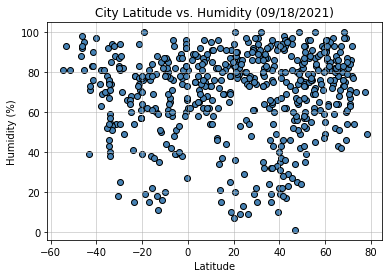

In [16]:
# Create Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title, labels and gridline
plt.title("City Latitude vs. Humidity (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linewidth=1, alpha = 0.5)

# Export as .png file
plt.savefig("output_data/City Latitude vs Humidity.png")

High humidity seems to be present in most latitudes, however low humidity cities are less abundant in the polar regions and equator

## Latitude vs. Cloudiness Plot

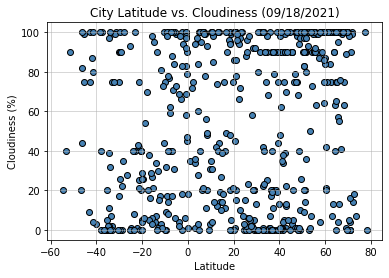

In [17]:
# Create Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title, labels and gridline
plt.title("City Latitude vs. Cloudiness (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linewidth=1, alpha = 0.5)

# Export as .png file
plt.savefig("output_data/City Latitude vs Cloudiness.png")

Cloudiness is rather spread out according to latitudes, however there seems to be many maximum and minimum cloudiness cities, that is, many 0% and 100%. 

## Latitude vs. Wind Speed Plot

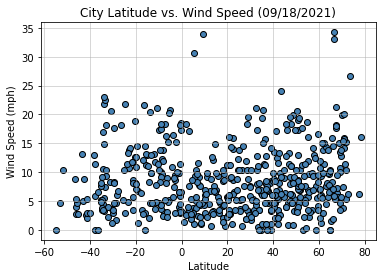

In [18]:
# Create Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title, labels and gridline
plt.title("City Latitude vs. Wind Speed (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linewidth=1, alpha = 0.5)

# Export as .png file
plt.savefig("output_data/City Latitude vs Wind Speed.png")

The wind speed for cities are widely spread regardless of their latitude.

## Linear Regression

In [22]:
# Separate data according to their hemispheres
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

# Create a scatter plot and linear regression function
def linear_regression(x,y):
    # Linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    # Set line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Scatter plot
    plt.scatter(x, y)
    plt.grid(linewidth=1, alpha = 0.5)
    plt.plot(x,regress_values,"r-")
    
    print(f"The r-value is : {round(st.pearsonr(x, y)[0],2)}")
    
    return line_eq

# Create an annotation function
def annotate(text, a, b):
    plt.annotate(text,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.82


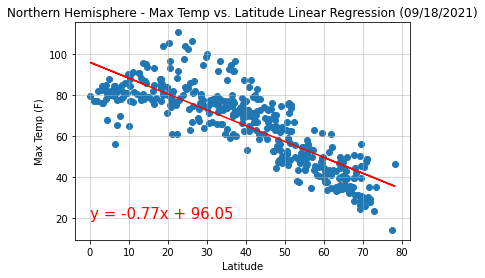

In [50]:
# Call the linear_regression function
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call the annotate function
annotate(equation, 0, 20)

# Set title and labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Export as png
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a strong negative correlation between maximum temperate and latitude of the cities in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.78


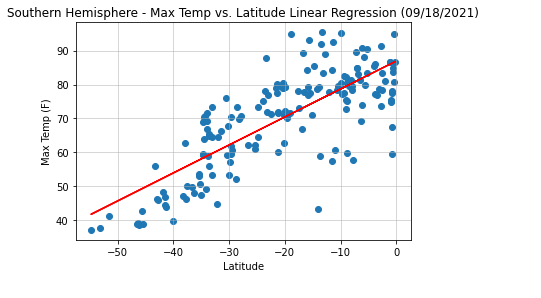

In [51]:
# Call the linear_regression function
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Call the annotate function
annotate(equation, 0, 20)

# Set title and labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Export as png
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a strong positive correlation between maximum temperate and latitude of the cities in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.05


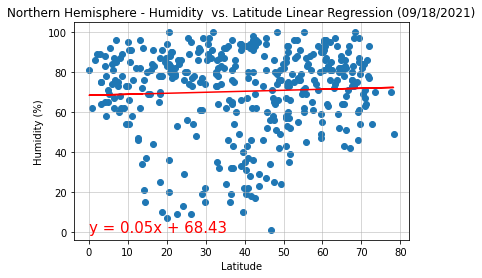

In [52]:
# Call the linear_regression function
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call the annotate function
annotate(equation, 0, 0)

# Set title and labels
plt.title("Northern Hemisphere - Humidity  vs. Latitude Linear Regression (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Export as png
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

There is no correlation between humidity and latitude of the cities in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : -0.13


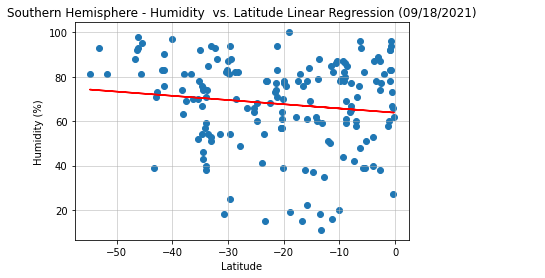

In [53]:
# Call the linear_regression function
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call the annotate function
annotate(equation, 0, 0)

# Set title and labels
plt.title("Southern Hemisphere - Humidity  vs. Latitude Linear Regression (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Export as png
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

There is a very weak positive correlation between humidity and latitude of the cities in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.17


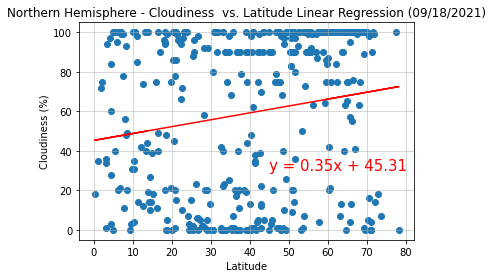

In [54]:
# Call the linear_regression function
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call the annotate function
annotate(equation, 45, 30)

# Set title and labels
plt.title("Northern Hemisphere - Cloudiness  vs. Latitude Linear Regression (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Export as png
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

There is a very weak positive correlation between cloudiness and latitude of the cities in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.12


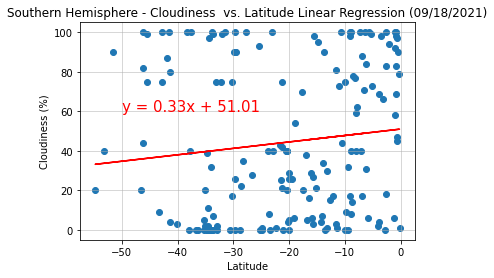

In [55]:
# Call the linear_regression function
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call the annotate function
annotate(equation, -50, 60)

# Set title and labels
plt.title("Southern Hemisphere - Cloudiness  vs. Latitude Linear Regression (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Export as png
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

There is a very weak positive correlation between cloudiness and latitude of the cities in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.22


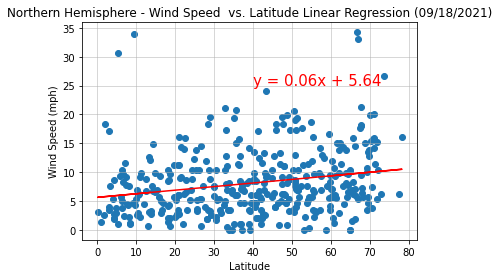

In [56]:
# Call the linear_regression function
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call the annotate function
annotate(equation, 40, 25)

# Set title and labels
plt.title("Northern Hemisphere - Wind Speed  vs. Latitude Linear Regression (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Export as png
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a very weak positive correlation between wind speed and latitude of the cities in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.19


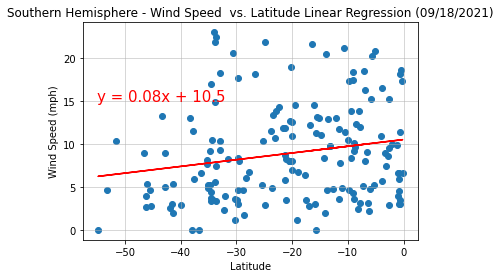

In [60]:
# Call the linear_regression function
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call the annotate function
annotate(equation, -55, 15)

# Set title and labels
plt.title("Southern Hemisphere - Wind Speed  vs. Latitude Linear Regression (09/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Export as png
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a very weak positive correlation between wind speed and latitude of the cities in the southern hemisphere.